In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
from sklearn import datasets
from sklearn.metrics import f1_score
from sklearn.metrics import rand_score
from sklearn.metrics import normalized_mutual_info_score
from RAi_ML import KMean
from RAi_ML import DBSCAN

In [3]:
n_samples = 300
random_state = 42
sb.set_style(style='darkgrid')

## <<***>>--Dataset1: blobs dataset--<<***>>
> Apply created models on **dataset1** and compare the results.

In [5]:
Ds1, Ds1_true_labels = datasets.make_blobs(n_samples=n_samples,random_state=random_state)

### Normal Data without Clustring

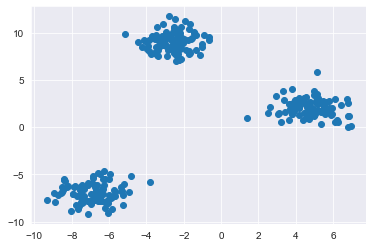

In [6]:
plt.scatter(Ds1[:,0] , Ds1[:,1]);

## KMean Clustring for : Dataset1

In [7]:
km = KMean(cluster=3,random_state=random_state)
km.fit(Ds1)
km_predicted_labels = km.labels_

KMean Algorithem completed


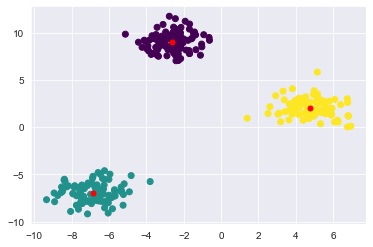

In [8]:
km.model_plot(centroids=True,color_set="viridis")

In [9]:
km_Ds1_f1 = f1_score(Ds1_true_labels, km_predicted_labels, average="micro")
km_Ds1_f1

0.3333333333333333

In [10]:
km_Ds1_NMI = normalized_mutual_info_score(Ds1_true_labels, km_predicted_labels)
km_Ds1_NMI

1.0

In [11]:
km_Ds1_rand = rand_score(Ds1_true_labels, km_predicted_labels)
km_Ds1_rand

1.0

## DBSCAN Clustring for : Dataset1

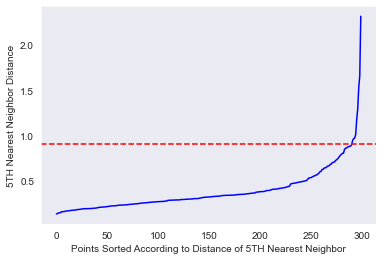

In [12]:
eps = 0.9
minPts = 5
db = DBSCAN(Ds1,eps,minPts)
db.best_eps()
plt.axhline(eps,color='r',linestyle = "--");

In [13]:
db.fit()
db_predicted_labels = db.predict()

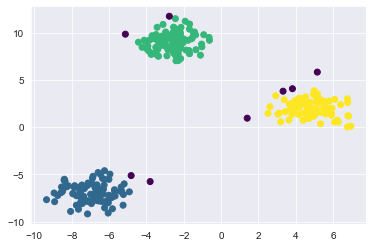

In [14]:
plt.scatter(Ds1[:,0] , Ds1[:,1], c = db_predicted_labels,cmap = "viridis");

In [15]:
db_Ds1_f1 = round(f1_score(Ds1_true_labels, db_predicted_labels,average='macro'),7)
db_Ds1_f1

0.0092593

In [16]:
db_Ds1_NMI = round(normalized_mutual_info_score(Ds1_true_labels, db_predicted_labels),4)
db_Ds1_NMI

0.9349

In [17]:
db_Ds1_rand = round(rand_score(Ds1_true_labels, db_predicted_labels),4)
db_Ds1_rand

0.9823

In [18]:
data = {'DataSets':['blobs dataset','blobs dataset'],
        'Algorithm':["Kmean","DBSCAN"],
        'f1_score':[km_Ds1_f1,db_Ds1_f1],
        'rand_score':[km_Ds1_NMI,db_Ds1_NMI],
        'normalized_mutual_info_score':[km_Ds1_rand,db_Ds1_rand]}

DS1_Comp_df = pd.DataFrame(data)
DS1_Comp_df

,DataSets,Algorithm,f1_score,rand_score,normalized_mutual_info_score
0,blobs dataset,Kmean,0.333333,1.0000,1.0000
1,blobs dataset,DBSCAN,0.009259,0.9349,0.9823


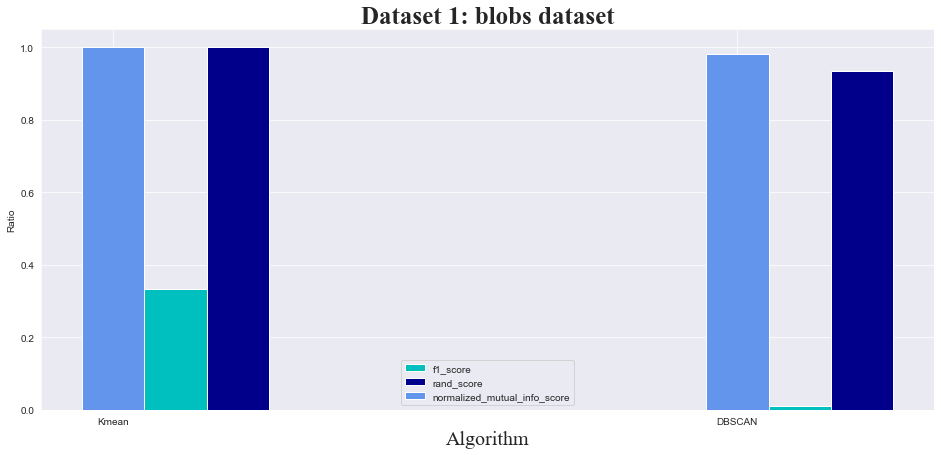

In [19]:
plt.figure(figsize=(16,7))
X = DS1_Comp_df['Algorithm']

f1 = DS1_Comp_df["f1_score"]
rand = DS1_Comp_df["rand_score"]
normalized_mutual_info = DS1_Comp_df["normalized_mutual_info_score"]

X_axis = np.arange(len(X))

plt.bar(X_axis+0.1, f1, 0.1, label = 'f1_score',color = "c")
plt.bar(X_axis+0.2, rand, 0.1, label = 'rand_score',color = "#00008B")
plt.bar(X_axis, normalized_mutual_info, 0.1, label = 'normalized_mutual_info_score',color = "#6495ED")

plt.xticks(X_axis, X)
plt.xlabel("Algorithm",fontsize = 20,fontname = "Times New Roman")
plt.ylabel("Ratio")
plt.title("Dataset 1: blobs dataset",fontsize = 25,fontweight = "bold",fontname = "Times New Roman")
plt.legend()
plt.show()

## ***>>--Dataset2: Anisotropicly distributed dataset--<<***

In [20]:
Ds2, Ds2_true_labels = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
Ds2 = np.dot(Ds2, transformation)

## KMean Clustring for : Dataset2

In [21]:
km = KMean(cluster=3,random_state=random_state)
km.fit(Ds2)
km_Ds2_predicted_labels = km.labels_

KMean Algorithem completed


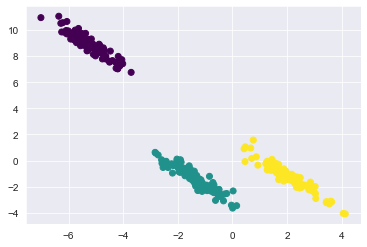

In [22]:
plt.scatter(Ds2[:,0] , Ds2[:,1], c = km_predicted_labels,cmap = "viridis");

In [23]:
km_Ds2_f1 = f1_score(Ds2_true_labels, km_Ds2_predicted_labels, average="macro")
km_Ds2_f1

0.0

In [24]:
km_Ds2_NMI = normalized_mutual_info_score(Ds2_true_labels, km_Ds2_predicted_labels)
km_Ds2_NMI

1.0

In [25]:
km_Ds2_rand = rand_score(Ds2_true_labels, km_Ds2_predicted_labels)
km_Ds2_rand

1.0

## DBSCAN Clustring for : Dataset2

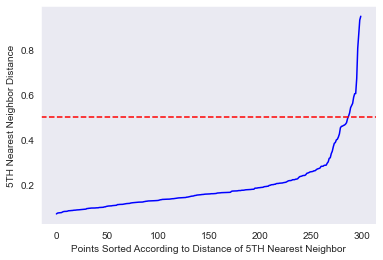

In [26]:
eps = 0.5
minPts = 5
db = DBSCAN(Ds2,eps,minPts)
db.best_eps()
plt.axhline(eps,color='r',linestyle = "--");

In [27]:
db.fit()
db_Ds2_predicted_labels = db.predict()

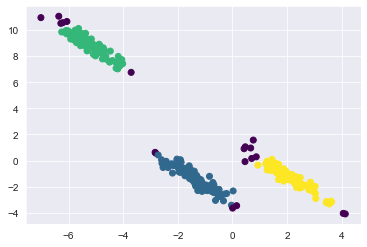

In [28]:
plt.scatter(Ds2[:,0] , Ds2[:,1], c = db_Ds2_predicted_labels, cmap = "viridis");

In [29]:
db_Ds2_f1 =  round(f1_score(Ds2_true_labels, db_Ds2_predicted_labels,average="macro"),4)
db_Ds2_f1

0.0252

In [30]:
db_Ds2_NMI =  round(normalized_mutual_info_score(Ds2_true_labels, db_Ds2_predicted_labels),4)
db_Ds2_NMI

0.8736

In [31]:
db_Ds2_rand =  round(rand_score(Ds2_true_labels, db_Ds2_predicted_labels),4)
db_Ds2_rand

0.9581

In [32]:
data = {'DataSets':['Anisotropicly distributed','Anisotropicly distributed'],
        'Algorithm':["Kmean","DBSCAN"],
        'f1_score':[km_Ds2_f1,db_Ds2_f1],
        'rand_score':[km_Ds2_NMI,db_Ds2_NMI],
        'normalized_mutual_info_score':[km_Ds2_rand,db_Ds2_rand]}

DS2_Comp_df = pd.DataFrame(data)
DS2_Comp_df

,DataSets,Algorithm,f1_score,rand_score,normalized_mutual_info_score
0,Anisotropicly distributed,Kmean,0.0000,1.0000,1.0000
1,Anisotropicly distributed,DBSCAN,0.0252,0.8736,0.9581


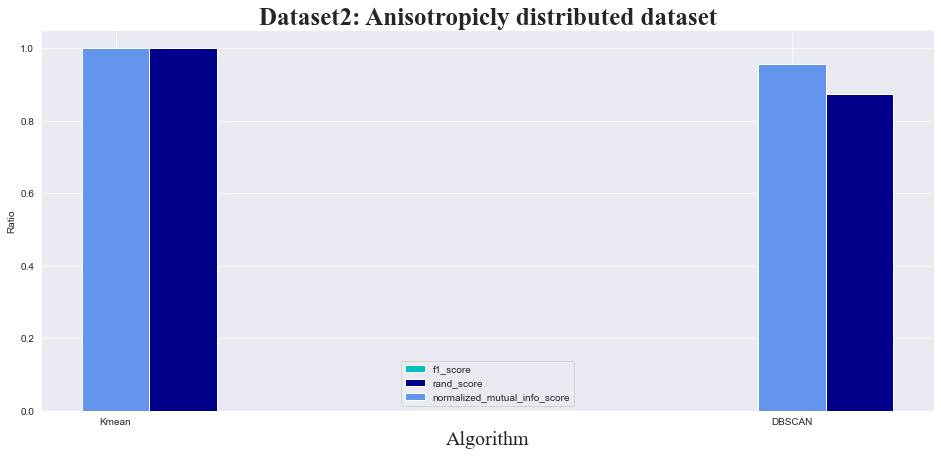

In [33]:
plt.figure(figsize=(16,7))
X = DS2_Comp_df['Algorithm']

f1 = DS2_Comp_df["rand_score"]
rand = DS2_Comp_df["rand_score"]
normalized_mutual_info = DS2_Comp_df["normalized_mutual_info_score"]

X_axis = np.arange(len(X))

plt.bar(X_axis+0.1, f1, 0.1, label = 'f1_score',color = "c")
plt.bar(X_axis+0.1, rand, 0.1, label = 'rand_score',color = "#00008B")
plt.bar(X_axis, normalized_mutual_info, 0.1, label = 'normalized_mutual_info_score',color = "#6495ED")

plt.xticks(X_axis, X)
plt.xlabel("Algorithm",fontsize = 20,fontname = "Times New Roman")
plt.ylabel("Ratio")
plt.title("Dataset2: Anisotropicly distributed dataset",fontsize = 25,fontweight = "bold",fontname = "Times New Roman")
plt.legend()
plt.show()

## ***>>--Dataset3: noisy moons dataset--<<***

In [34]:
Ds3, Ds3_true_labels = datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

## KMean Clustring for : Dataset3

In [35]:
km = KMean(cluster=3,random_state=random_state)
km.fit(Ds3)
km_Ds3_predicted_labels = km.labels_

KMean Algorithem completed


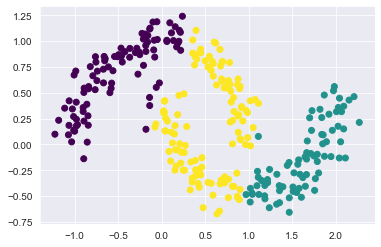

In [36]:
plt.scatter(Ds3[:,0] , Ds3[:,1], c = km_Ds3_predicted_labels,cmap = "viridis");

In [37]:
km_Ds3_f1 = f1_score(Ds3_true_labels, km_Ds3_predicted_labels,average="macro")
km_Ds3_f1        

0.47388346643005025

In [38]:
km_Ds3_NMI = normalized_mutual_info_score(Ds3_true_labels, km_Ds3_predicted_labels)
km_Ds3_NMI

0.3626606094722232

In [39]:
km_Ds3_rand = rand_score(Ds3_true_labels, km_Ds3_predicted_labels)
km_Ds3_rand

0.6472463768115942

## DBSCAN Clustring for : Dataset3

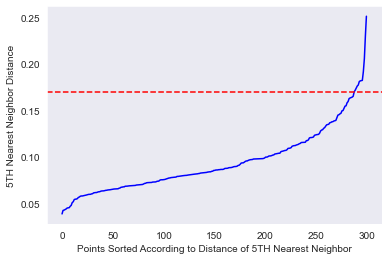

In [40]:
eps = 0.17
minPts = 5
db = DBSCAN(Ds3,eps,minPts)
db.best_eps()
plt.axhline(eps,color='r',linestyle = "--");

In [41]:
db.fit()
db_Ds3_predicted_labels = db.predict()

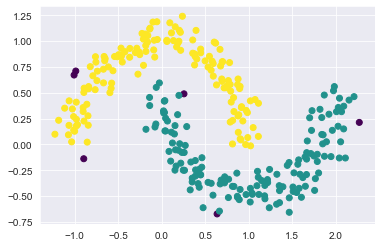

In [42]:
plt.scatter(Ds3[:,0] , Ds3[:,1], c = db_Ds3_predicted_labels,cmap = "viridis");

In [43]:
db_Ds3_f1 =  round(f1_score(Ds3_true_labels, db_Ds3_predicted_labels,average='macro'),4)
db_Ds3_f1

0.3428

In [44]:
db_Ds3_NMI =  round(normalized_mutual_info_score(Ds3_true_labels, db_Ds3_predicted_labels),4)
db_Ds3_NMI

0.9239

In [45]:
db_Ds3_rand =  round(rand_score(Ds3_true_labels, db_Ds3_predicted_labels),4)
db_Ds3_rand

0.9801

In [46]:
data = {'DataSets':['noisy moons','noisy moons'],
        'Algorithm':["Kmean","DBSCAN"],
        'f1_score':[km_Ds3_f1,db_Ds3_f1],
        'rand_score':[km_Ds3_NMI,db_Ds3_NMI],
        'normalized_mutual_info_score':[km_Ds3_rand,db_Ds3_rand]}

DS3_Comp_df = pd.DataFrame(data)
DS3_Comp_df

,DataSets,Algorithm,f1_score,rand_score,normalized_mutual_info_score
0,noisy moons,Kmean,0.473883,0.362661,0.647246
1,noisy moons,DBSCAN,0.342800,0.923900,0.980100


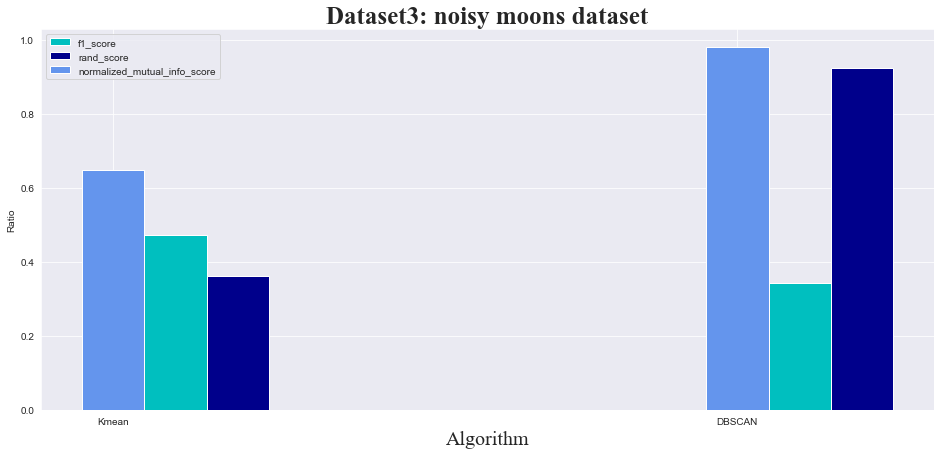

In [47]:
plt.figure(figsize=(16,7))
X = DS3_Comp_df['Algorithm']

f1 = DS3_Comp_df["f1_score"]
rand = DS3_Comp_df["rand_score"]
normalized_mutual_info = DS3_Comp_df["normalized_mutual_info_score"]

X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.1, f1, 0.1, label = 'f1_score',color = "c")    
plt.bar(X_axis + 0.2, rand, 0.1, label = 'rand_score',color = "#00008B")
plt.bar(X_axis, normalized_mutual_info, 0.1, label = 'normalized_mutual_info_score',color = "#6495ED")

plt.xticks(X_axis, X)
plt.xlabel("Algorithm",fontsize = 20,fontname = "Times New Roman")
plt.ylabel("Ratio")
plt.title("Dataset3: noisy moons dataset",fontsize = 25,fontweight = "bold",fontname = "Times New Roman")
plt.legend()
plt.show()

## ***>>--Dataset4: noisy circles dataset--<<***

In [48]:
Ds4, Ds4_true_labels = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05,random_state=random_state)

## KMean Clustring for : Dataset4

In [49]:
km = KMean(cluster=3,random_state=random_state)
km.fit(Ds4)
km_Ds4_predicted_labels = km.labels_

KMean Algorithem completed


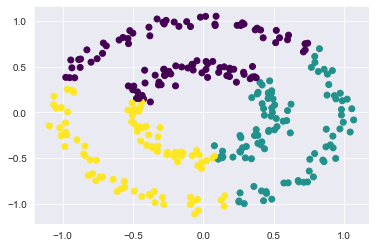

In [50]:
plt.scatter(Ds4[:,0] , Ds4[:,1], c = km_Ds4_predicted_labels,cmap = "viridis");

In [51]:
km_Ds4_f1 = f1_score(Ds4_true_labels, km_Ds4_predicted_labels, average="macro")
km_Ds4_f1

0.27140587974897795

In [52]:
km_Ds4_NMI = normalized_mutual_info_score(Ds4_true_labels, km_Ds4_predicted_labels)
km_Ds4_NMI

0.00011537535645064182

In [53]:
km_Ds4_rand = rand_score(Ds4_true_labels, km_Ds4_predicted_labels)
km_Ds4_rand

0.49839464882943146

## DBSCAN Clustring for : Dataset4

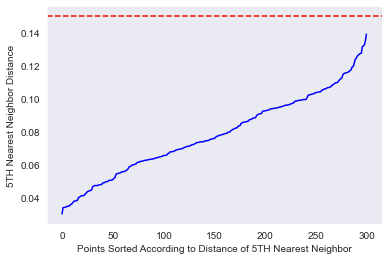

In [54]:
eps = 0.15
minPts = 5
db = DBSCAN(Ds4,eps,minPts)
db.best_eps()
plt.axhline(eps,color='r',linestyle = "--");

In [55]:
db.fit()
db_Ds4_predicted_labels = db.predict()
db_Ds4_predicted_labels.value_counts()

1    150
4     74
2     57
5     13
3      6
Name: Clusters, dtype: int64

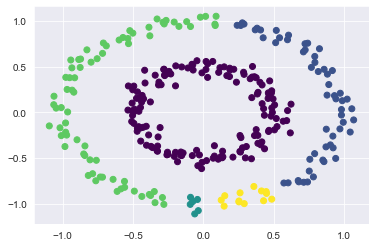

In [56]:
plt.scatter(Ds4[:,0] , Ds4[:,1], c = db_Ds4_predicted_labels,cmap = "viridis");

In [57]:
db_Ds4_f1 = round(f1_score(Ds4_true_labels, db_Ds4_predicted_labels,average="macro"),4)
db_Ds4_f1

0.1667

In [58]:
db_Ds4_NMI = round(normalized_mutual_info_score(Ds4_true_labels, db_Ds4_predicted_labels),4)
db_Ds4_NMI

0.724

In [59]:
db_Ds4_rand = round(rand_score(Ds4_true_labels, db_Ds4_predicted_labels),4)
db_Ds4_rand

0.8487

In [60]:
data = {'DataSets':['noisy circles','noisy circles'],
        'Algorithm':["Kmean","DBSCAN"],
        "f1_score" : [km_Ds4_f1, db_Ds4_f1],
        'rand_score':[km_Ds4_NMI,db_Ds4_NMI],
        'normalized_mutual_info_score':[km_Ds4_rand,db_Ds4_rand]}

DS4_Comp_df = pd.DataFrame(data)
DS4_Comp_df

,DataSets,Algorithm,f1_score,rand_score,normalized_mutual_info_score
0,noisy circles,Kmean,0.271406,0.000115,0.498395
1,noisy circles,DBSCAN,0.166700,0.724000,0.848700


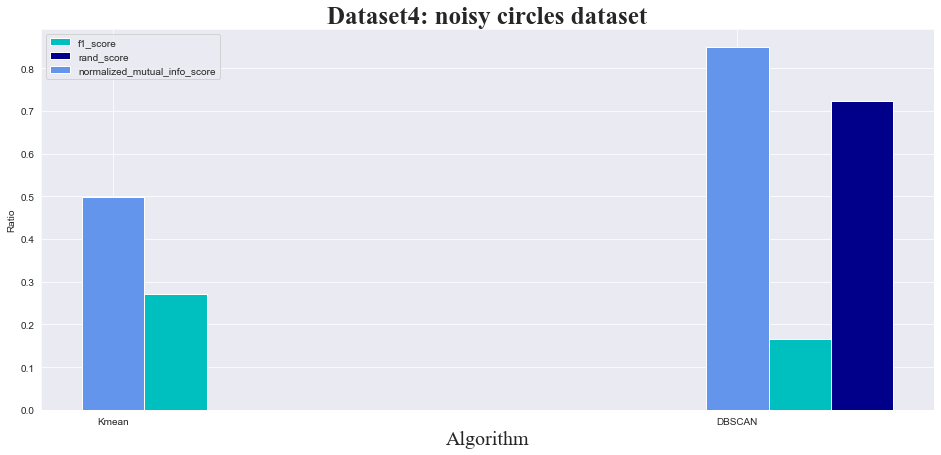

In [61]:
plt.figure(figsize=(16,7))
X = DS4_Comp_df['Algorithm']


f1 = DS4_Comp_df["f1_score"]
rand = DS4_Comp_df["rand_score"]
normalized_mutual_info = DS4_Comp_df["normalized_mutual_info_score"]

X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.1, f1, 0.1, label = 'f1_score',color = "c")    
plt.bar(X_axis + 0.2, rand, 0.1, label = 'rand_score',color = "#00008B")
plt.bar(X_axis, normalized_mutual_info, 0.1, label = 'normalized_mutual_info_score',color = "#6495ED")


plt.xticks(X_axis, X)
plt.xlabel("Algorithm",fontsize = 20,fontname = "Times New Roman")
plt.ylabel("Ratio")
plt.title("Dataset4: noisy circles dataset",fontsize = 25,fontweight = "bold",fontname = "Times New Roman")
plt.legend()
plt.show()

In [62]:
dfs = []
dfs.extend([DS1_Comp_df, DS2_Comp_df, DS3_Comp_df,DS4_Comp_df])
df = pd.concat(dfs)
df

,DataSets,Algorithm,f1_score,rand_score,normalized_mutual_info_score
0,blobs dataset,Kmean,0.333333,1.000000,1.000000
1,blobs dataset,DBSCAN,0.009259,0.934900,0.982300
0,Anisotropicly distributed,Kmean,0.000000,1.000000,1.000000
1,Anisotropicly distributed,DBSCAN,0.025200,0.873600,0.958100
0,noisy moons,Kmean,0.473883,0.362661,0.647246
1,noisy moons,DBSCAN,0.342800,0.923900,0.980100
0,noisy circles,Kmean,0.271406,0.000115,0.498395
1,noisy circles,DBSCAN,0.166700,0.724000,0.848700


In [63]:
# !jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

In [71]:
df.groupby(by = ['DataSets'],group_keys=True).apply(lambda x: x)

,DataSets,Algorithm,f1_score,rand_score,normalized_mutual_info_score
0,Anisotropicly distributed,Kmean,0.000000,1.000000,1.000000
1,Anisotropicly distributed,DBSCAN,0.025200,0.873600,0.958100
0,blobs dataset,Kmean,0.333333,1.000000,1.000000
1,blobs dataset,DBSCAN,0.009259,0.934900,0.982300
0,noisy circles,Kmean,0.271406,0.000115,0.498395
1,noisy circles,DBSCAN,0.166700,0.724000,0.848700
0,noisy moons,Kmean,0.473883,0.362661,0.647246
1,noisy moons,DBSCAN,0.342800,0.923900,0.980100
